<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/012_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

1. To find the median, we have to sort the Dataset: [30, 31, 32, 32, 33, 33, 34, 34, 35, 500]

  Median = (33 + 33) / 2 = 33

  Q1 = Median of lower half = 32

  Q3 = Median of upper half = 34

  IQR = Q3 - Q1 = 34 - 32 = 2

2. If 500 > Q3 + 1.5 * IQR, then 500 will be outlier.
Q3 + 1.5 * IQR = 34 + 1.5 * 2 = 37. Here 500 > 37. So 500 is an outlier.

3. The mean + standard deviation won't be a good option. The overall Mean of this dataset will change because there is a bigger value(500) and standard deviation indicates the deviation of a value from the mean. But there is a very bigger value in dataset and standard deviation uses mean for computation. So standard deviation value will be inappropriate.
On the other hand, Median + IQR will be a good option. Using median we will get the proper mid value. Using IQR, it will detect 500 as an outlier.  


In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

1. Say total population = 10,000

Actual positive = 10,000 * 1% = 100
Actual Negative = 10,000 - 100 = 9900

Sensitivity or P(+|D) = 0.90 and Speicificity or P(-|~D) = 0.92 and P(+| ~D) = 1 - P(-| ~D) = 1 - 0.92 = 0.08

PPV or P(D|+) = (P(+|D) * P(D)) / P(+)

Here, P(+) = P(+|D) x P(D) + P(+| ~D) x P( ~D) = 0.90 x 100 + 0.08 x 9900 = 882

PPV = (0.90 * 100) / 882 = 0.102

2. If prevalence rises to 20 percent, PPV will also increase. From Bayes formula we know, P(D|+) = (P(+|D) * P(D)) / P(+). So increasing the prevalence or P(D) upto 20% will increase the value of PPV directly.



### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

1. This is a classification problem. Becuase the target variable (premium_user) has binary value (0/1).
2. Here are four preprocessing steps:
*   Detect outliers using boxplot for every numeric column.
*   Normalizing numeric features because we have to keep the numeric features in a range.
*   Handling missing value for every column. We have to fill up every Nan value.
*   One hot encoding for region column. Because region has 7 levels which are categorical values and we have to convert it to numeric. We will use one hot encoding because we can't level or rank the region.
3. Firstly, we will figure out the numeric and categorical value from the dataset. Then, we will handle missing value and have to figure out how to fill these values(mean, median or mode). Then we have to deal with the outliers. We have to find the outliers using IQR method. After finding outliers we will remove it. Then, scaling the numeric features for this problem. Also we have to do one hot encoding for categorical column "region". Then we have to split the dataset into train test. Because it's a classification model, we have to train a classification model like such as Logistic Regression or Decision Tree. After training, we have to evaluate the test set by using accuracy, precision, recall, F1-score and AUC curve.



---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [ ]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


Missing value summary for each column:  age             2
region          0
purchases       1
premium_user    0
dtype: int64
Number of unique values per column:  age             5
region          4
purchases       6
premium_user    2
dtype: int64


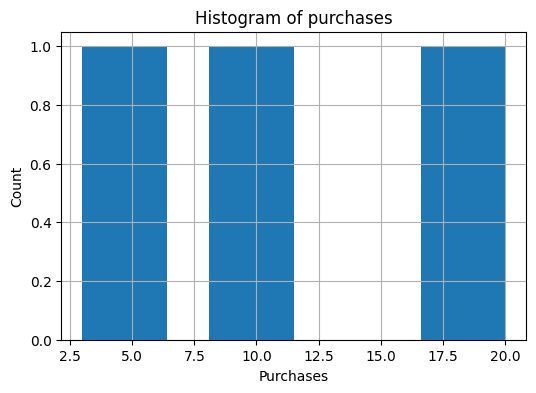

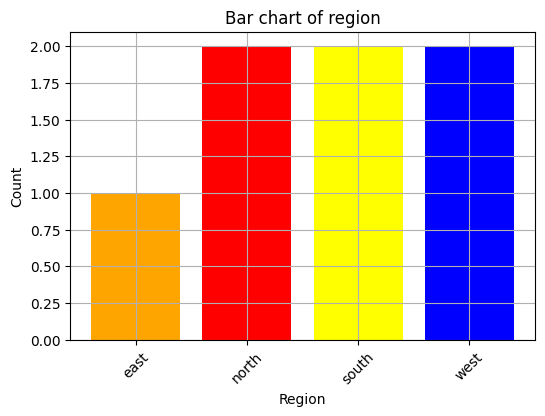

In [ ]:
# Q4 – Student Answer
# 1
print("Missing value summary for each column: ", df.isnull().sum())
print("Number of unique values per column: ", df.nunique())
# plotting histogram for purchases
plt.hist(df['purchases'])
plt.title('Histogram of purchases')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.show()
# plotting bar chart for region
region_group = df.groupby('region').size()
plt.bar(region_group.index, region_group.values, color = ['orange', 'red', 'yellow', 'blue'])
plt.title('Bar chart of region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Q4 – Student Answer
# 2
df['age'] = df['age'].fillna(df['age'].median())
df['purchases'] = df['purchases'].fillna(df['purchases'].mean())
# one hot encoding for region column
cat_cols = ["region"]
df_encoded = pd.get_dummies(
    df,
    columns = cat_cols,
    dtype=int
)
# scalling numeric values using RobustScaler
numeric_cols = ['age', 'purchases']
scaler_rs = RobustScaler()
df_encoded[numeric_cols] = scaler_rs.fit_transform(df[numeric_cols])

In [ ]:
# Q4 – Student Answer
# 3
df_encoded['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100], labels=['Young', 'Adult', 'Mid-age', 'Senior'])

In [ ]:
# Q4 – Student Answer
# 4
df = df_encoded
df

,age,purchases,premium_user,region_east,region_north,region_south,region_west,age_group
0,-0.5,-0.943820,0,0,1,0,0,Young
1,0.0,0.000000,1,0,0,1,0,Adult
2,0.0,-0.674157,0,0,1,0,0,Adult
3,-0.8,0.112360,0,1,0,0,0,Young
4,1.5,1.348315,1,0,0,0,1,Mid-age
5,2.2,1.078652,1,0,0,0,1,Senior
6,0.0,-0.134831,0,0,0,1,0,Adult


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [ ]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


In [ ]:
# Q5 – Student Answer
# 2
# target column
target_col = "price"
# droping target column for train set
X = df2.drop(columns=[target_col])
# putting test set into y
y = df2[target_col]
# splitting the dataset into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [ ]:
# Q5 – Student Answer
# 3
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Q5 – Student Answer
# 4
y_pred = model.predict(X_test)
print("Model Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)
print("Test Set Predictions:", y_pred)

Model Intercept: -33.84615384615387
Model Coefficients: [0.15384615 5.38461538]
Test Set Predictions: [100.         130.76923077]


In [ ]:
# Q5 – Student Answer
# 5
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 19.615384615384613
Root Mean Squared Error (RMSE): 19.61915499208746
R-squared (R²): -0.7107166337935567


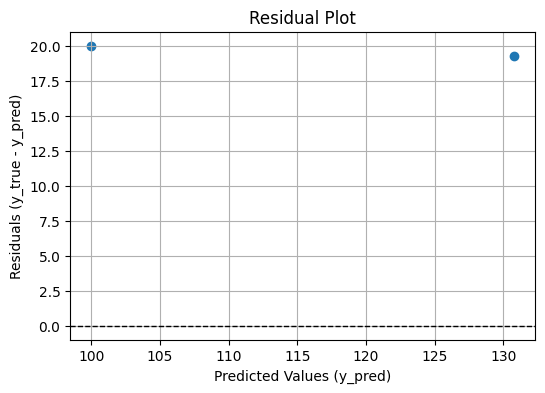

In [ ]:
# Q5 – Student Answer
# 6
residuals = y_test.values - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residual Plot")
plt.show()

# The residual plot shows two test points, and both residuals are positive and relatively large (around 19–20).
# This means the model is consistently under-predicting the actual house prices in the test set.
# If the values were negative then the model will over-predict which means the predicted values is greater than actual value.

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below
def compute_metrics(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Precision, Recall, F1
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return y_pred, cm, precision, recall, f1

# Task 1: Threshold 0.5
y_pred_05, cm_05, precision_05, recall_05, f1_05 = compute_metrics(y_true, y_prob, 0.5)
print("Confusion Matrix:\n", cm_05)
print("Precision:", precision_05)
print("Recall:", recall_05)
print("F1 Score:", f1_05)
print("\n")
# Task 2: Threshold 0.3
y_pred_03, cm_03, precision_03, recall_03, f1_03 = compute_metrics(y_true, y_prob, 0.3)
print("Confusion Matrix:\n", cm_03)
print("Precision:", precision_03)
print("Recall:", recall_03)
print("F1 Score:", f1_03)

Confusion Matrix:
 [[5 0]
 [0 5]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Confusion Matrix:
 [[3 2]
 [0 5]]
Precision: 0.7142857142857143
Recall: 1.0
F1 Score: 0.8333333333333334


# Q6 - Student Answer
# 3.
By lowering the threshold from 0.5 to 0.3, there is chances of getting more positive values. So chances of getting False positive value increases. By this, we know Precision = TP / (TP + FP). So, the FP value increases and Precision value gets decreased. On the other hand, we know Recall = TP / (TP + FN). But there is no chance of getting FN values because lowering thershold will improve chances of getting positive values. So Recall remains unchanged.

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._

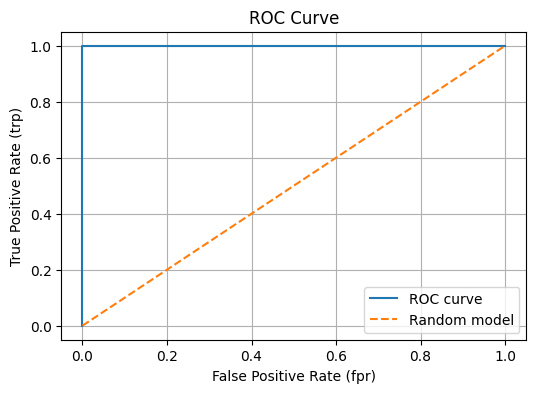

In [ ]:
# Q6 - Student Answer
# 4.
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (trp)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Q6 - Student Answer
# 5.
# Compute AUC
roc_auc = auc(fpr, tpr)
print('AUC: ',round(roc_auc, 3))

AUC:  1.0


# Q6 - Student Answer
# 6.
AUC or area the under the curve and close to value 1.0 means the model is perfectly classifying. Under 0.5 value means the model is not performing good.

In [ ]:
# Q6 - Student Answer
# 7.
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
X = df3[["hours"]]
y = df3["passed"]
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

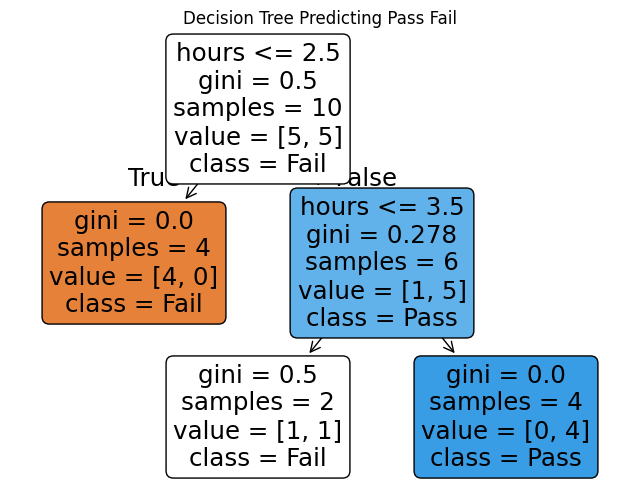

In [ ]:
# Q6 - Student Answer
# 8.
plt.figure(figsize=(8,6))
plot_tree(
    clf,
    feature_names=['hours','passed'],
    class_names = ['Fail', 'Pass'],
    filled = True,
    rounded = True,
)
plt.title("Decision Tree Predicting Pass Fail")
plt.show()

# Q6 - Student Answer
# 9.
The dataset size is very small. So the model is likely to be overfitting for this dataset. The model depth is so small so it can easily memorize the training examples. As a result, the model may run well on this dataset of 10 samples, but it may fail to predict values that are new or different from this dataset.